# Manually label region on dataset
- scale data

In [1]:
import squidpy as sq
import scanpy as sc
from matplotlib import colors 
import numpy as np

from scSLAT.model import scanpy_workflow

In [32]:
sc.set_figure_params(dpi=120)

In [3]:
adata = sc.read_h5ad('./count_E15.5_E1S1.MOSTA.h5ad')

In [32]:
min_x = np.min(adata.obsm['spatial'][:,0])
max_x = np.max(adata.obsm['spatial'][:,1])
min_y = np.min(adata.obsm['spatial'][:,0])
max_y = np.max(adata.obsm['spatial'][:,1])

In [34]:
max_x - min_x 

809.1819478320938

In [35]:
max_y - min_y

809.1819478320938

In [36]:
min_x

-338.0175302289066

In [37]:
min_y

-338.0175302289066

In [40]:
def make_ground(x_range,y_range,x_shape,y_shape,color='white'):
    x = np.linspace(x_range[0],x_range[1],x_shape)
    y = np.linspace(y_range[0],y_range[1],y_shape)
    rgb = colors.to_rgb(color)
    ground = np.array( np.dstack([np.array([x,y])]*3) * rgb)
    return ground

In [39]:
ground = make_ground([max_x, min_x],[max_y, min_y],1500,1500,'white')

In [43]:
ground.shape

(2, 1500, 3)

In [41]:
pic = sq.im.ImageContainer(ground)

In [30]:
adata.uns['spatial'] = {}
adata.uns['spatial']['0'] = {}
adata.uns['spatial']['0']['scalefactors'] = {}
adata.uns['spatial']['0']['scalefactors']['spot_diameter_fullres'] = 1

In [42]:
viewer = pic.interactive(adata)

# Test 10X DLPFC

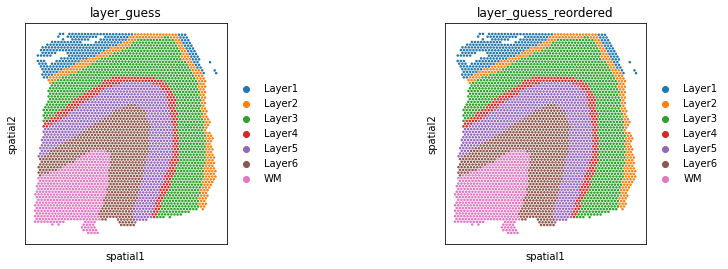

In [17]:
test = sc.read_h5ad('../../../data/visum/DLPFC/151673_preprocessed.h5')
sc.pl.spatial(test, color=['layer_guess','layer_guess_reordered'],spot_size=5)

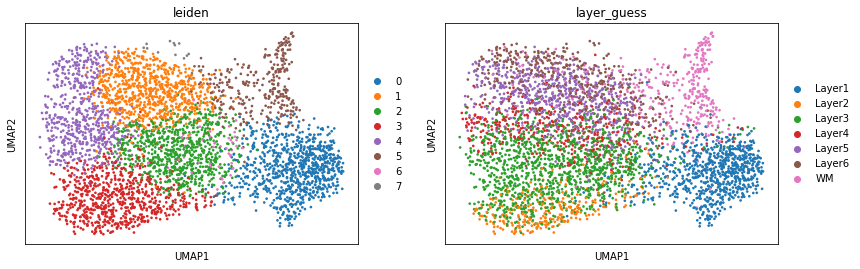

In [5]:
test = scanpy_workflow(test)
sc.pp.neighbors(test)
sc.tl.umap(test)
sc.tl.leiden(test)
sc.pl.umap(test, color=["leiden","layer_guess"])